# Car price prediction using Multivariate Regression

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [2]:
x=df[['wheelbase','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
y=df['price']

x[['wheelbase','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]=scale.fit_transform(x[['wheelbase','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']])
print (x)

res=sm.OLS(y,x).fit()
res.summary()

<ipython-input-2-b4e00eb8624e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['wheelbase','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]=scale.fit_transform(x[['wheelbase','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


     wheelbase  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    -1.690772   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
1    -1.690772   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
2    -0.708596  -2.404880  0.685946         -0.288349    1.264536 -0.262960   
3     0.173698  -0.517266  0.462183         -0.035973   -0.053668  0.787855   
4     0.107110  -0.517266  0.462183         -0.540725    0.275883  0.787855   
..         ...        ...       ...               ...         ...       ...   
200   1.721873   1.666445 -0.336970         -0.162161    0.250533  0.577692   
201   1.721873   1.666445 -0.336970         -0.364062    1.416637  0.367529   
202   1.721873   0.926204 -1.232021         -0.338824    0.757535  0.787855   
203   1.721873  -1.183483  0.462183          3.244916    0.047732 -0.683286   
204   1.721873   1.666445 -0.336970         -0.162161    0.250533  0.577692   

      citympg  highwaympg  
0   -0.646553   -0.5460

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.205
Model:                            OLS   Adj. R-squared (uncentered):              0.173
Method:                 Least Squares   F-statistic:                              6.358
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    2.46e-07
Time:                        18:04:56   Log-Likelihood:                         -2245.1
No. Observations:                 205   AIC:                                      4506.
Df Residuals:                     197   BIC:                                      4533.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         2071.8112   1458.421      1.421      0.157    -804.309    4947.932
boreratio         -377.9798   1416.614     -0.267      0.790   -3171.655    2415.695
stroke            -484.1918   1035.914     -0.467      0.641   -2527.096    1558.713
compressionratio  1311.7705   1259.266      1.042      0.299   -1171.601    3795.143
horsepower        5916.1843   1743.427      3.393      0.001    2478.008    9354.361
peakrpm           -271.8567   1230.854     -0.221      0.825   -2699.199    2155.485
citympg            328.7577   4749.589      0.069      0.945   -9037.807    9695.323
highwaympg        -798.6145   4573.731     -0.175      0.862   -9818.373    8221.144
==============================================================================
Omnibus:                       47.625   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.772
Skew:                           1.018   Prob(JB):                     1.62e-26
Kurtosis:                       6.125   Cond. No.                         12.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the summary of the model we can observe that the variables like 'peakrpm'  ,  'stroke'  ,  'boreratio' and 'highwaympg' doesn't influence on the price of the car and  'horsepower'  is more important than anything based on the coefficients.

In [46]:
x=['wheelbase','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

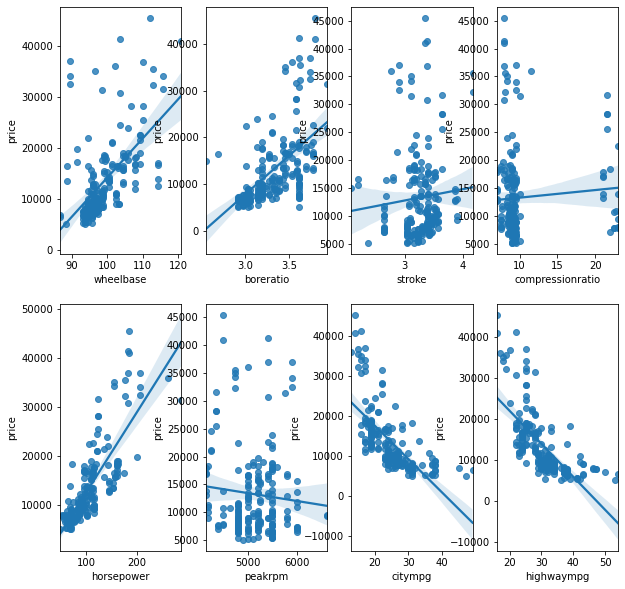

In [50]:
fig,axs = plt.subplots(nrows = 2,ncols =4, figsize =(10,10))
for i in range(0,len(x)):
    rows=i//4
    cols=i%4
    ax=axs[rows,cols]
    plot=sns.regplot(x=x[i],y=y,data=df,ax=ax)